In [1]:
# Importing libraries
import pandas as pd
import os
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the excel sheet into df
df = pd.read_excel("C:\\Users\krish\Data\Final\Data\Processed.xls")
data = copy.copy(df)

# Viewing first 5 rows of data
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
# Diplaying the number of rows and columns
df.shape

(1200, 28)

### There are 1200 Rows and 28 Columns

In [4]:
# Checking for null values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### There is no null value

In [5]:
# Checking for duplicate values
df.duplicated().sum()

0

### There is no Duplicate value

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

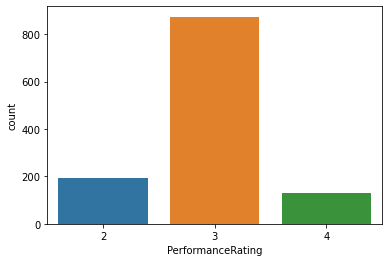

In [6]:
# Checking if the data is Imbalanced
sns.countplot(data.PerformanceRating)

### Dataset is Imbalanced

In [7]:
# Taking out catogorical for lable encoding
df.select_dtypes(include='object').columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [8]:
# Giving label for catogorical columns
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['EducationBackground']= label_encoder.fit_transform(df['EducationBackground'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['EmpDepartment']= label_encoder.fit_transform(df['EmpDepartment'])
df['EmpJobRole']= label_encoder.fit_transform(df['EmpJobRole'])
df['BusinessTravelFrequency']= label_encoder.fit_transform(df['BusinessTravelFrequency'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])
df['Attrition']= label_encoder.fit_transform(df['Attrition'])

In [9]:
# Assigning Predictor and Target variable
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

### Most of the Employee got the Performance rating as 3. This is an Imbalanced Data.

## To Overcome Imbalanced dataset we are using Oversampling method as the dataset is small, Using SMOTE (Synthetic Minority Over-sampling Technique) Method

In [10]:
# Splitting the X and y into Test and Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Taking a copy of y_train before sampling for comparison later
y_train_before = y_train

# Transform the dataset using SMOTE Method
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Splitting the X and y into Test and Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

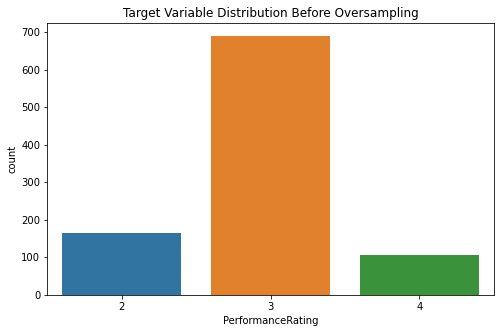

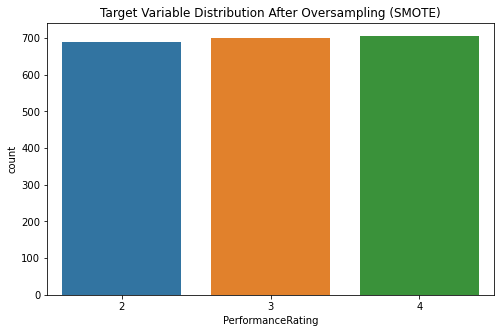

In [11]:
# Plot the distribution of the target variable before oversampling
plt.figure(figsize=(8, 5))
sns.countplot(y_train_before.PerformanceRating)
plt.title("Target Variable Distribution Before Oversampling")
plt.show()

# Plot the distribution of the target variable after oversampling
plt.figure(figsize=(8, 5))
sns.countplot(y_train.PerformanceRating)
plt.title("Target Variable Distribution After Oversampling (SMOTE)")
plt.show()

### From the above plot we can clearly see that we have a balanced data now.

In [12]:
# Storing the Dataframe Data
%store X
%store y
%store data

Stored 'X' (DataFrame)
Stored 'y' (DataFrame)
Stored 'data' (DataFrame)
